# Mercedes-Benz Greener Manufacturing

Data Description
This dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.

The ground truth is labeled ‘y’ and represents the time (in seconds) that the car took to pass testing for each variable.

File descriptions
Variables with letters are categorical. Variables with 0/1 are binary values.

train.csv - the training set
test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file
sample_submission.csv - a sample submission file in the correct format

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(df.shape)
df.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df.isnull().sum().reset_index().sort_values(0,ascending = False)
#Hence, There is no missing values

,index,0
0,ID,0
248,X254,0
257,X263,0
256,X262,0
255,X261,0
254,X260,0
253,X259,0
252,X258,0
251,X257,0
250,X256,0


In [5]:
for i in df.columns:
    print(i)
    print(df[i].unique())

ID
[   0    6    7 ... 8412 8415 8417]
y
[130.81  88.53  76.26 ...  85.71 108.77  87.48]
X0
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3
['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4
['d' 'b' 'c' 'a']
X5
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6
['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8
['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']
X10
[0 1]
X11
[0]
X12
[0 1]
X13

In [6]:
#Removing Features that has same value
nunique = df.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
df_1 = df.drop(cols_to_drop, axis=1)
print(df.shape)
print(df_1.shape)

(4209, 378)
(4209, 366)


#### Hence, there is no missing values & no int to detect for outliers. so, i'm skiping data cleaning/'

# Data Visualization

In [7]:
train = df_1.drop('ID',axis=1)

In [8]:
obj_col = train.select_dtypes(object).columns
num_col = train.select_dtypes(exclude=object).columns
print(obj_col)
print(num_col)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
Index(['y', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=357)


In [9]:
train.describe()
#Hence, all values were 0 & 1. There is no outliars

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,0.099549,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,0.299433,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


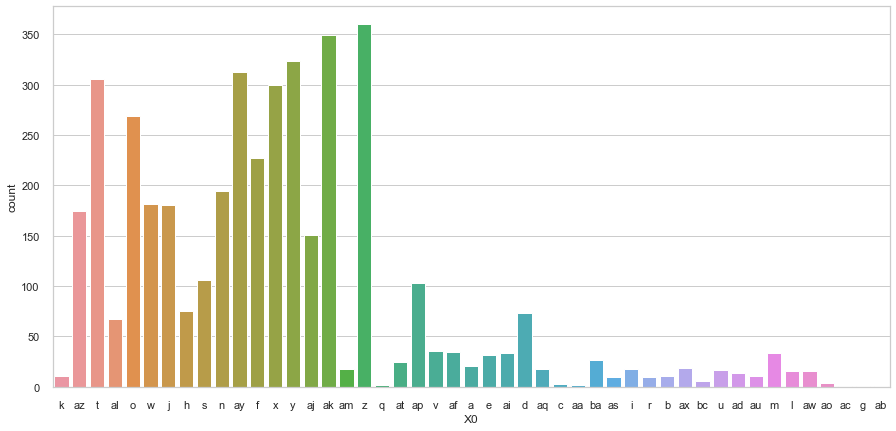

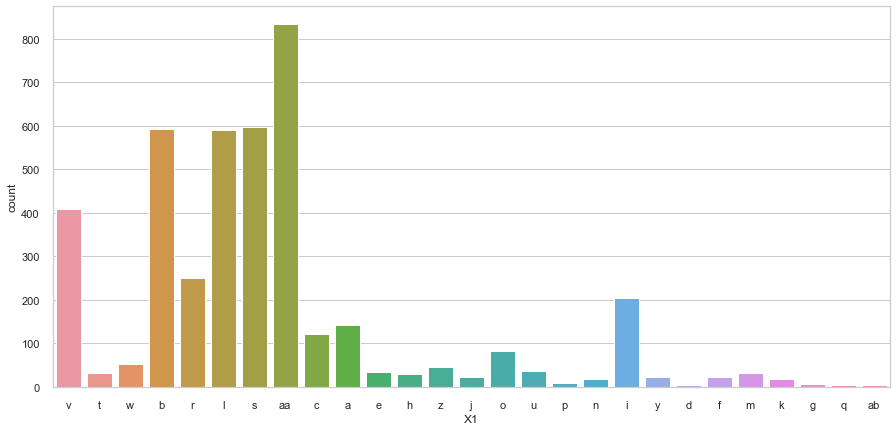

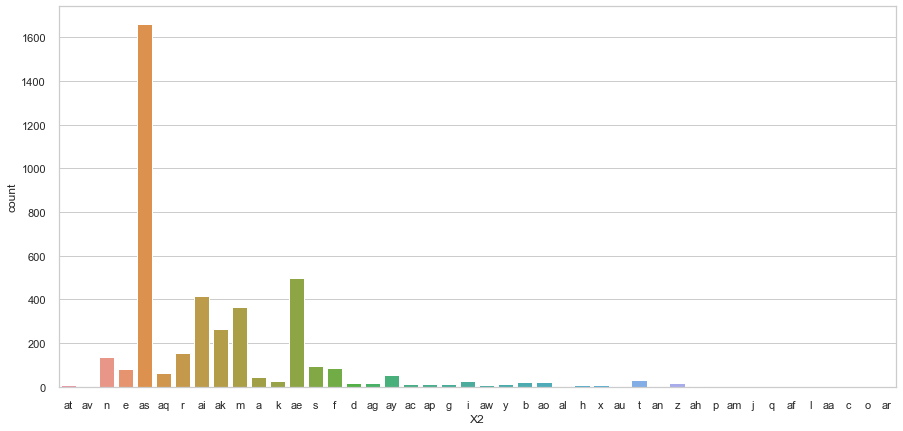

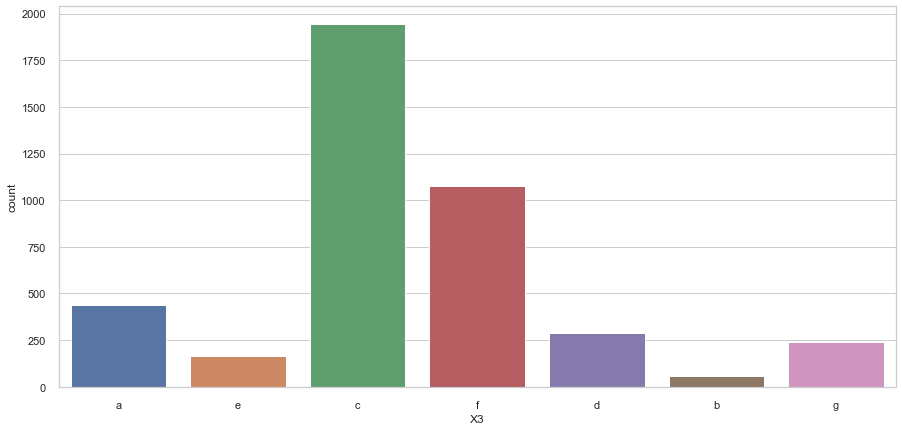

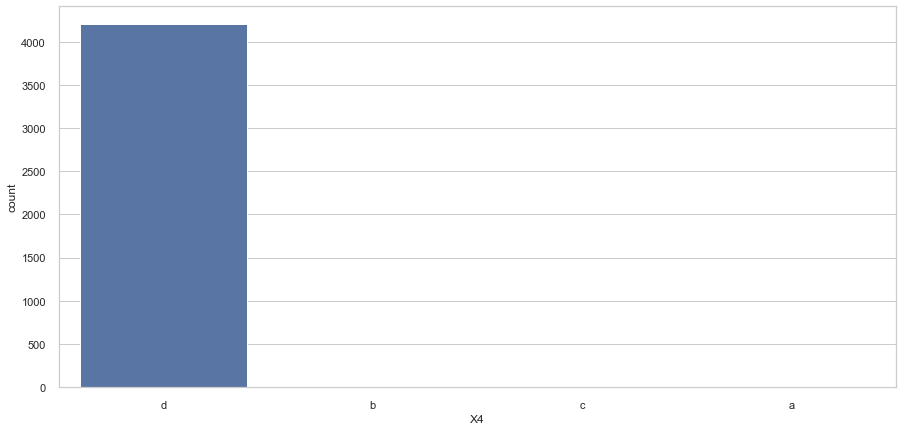

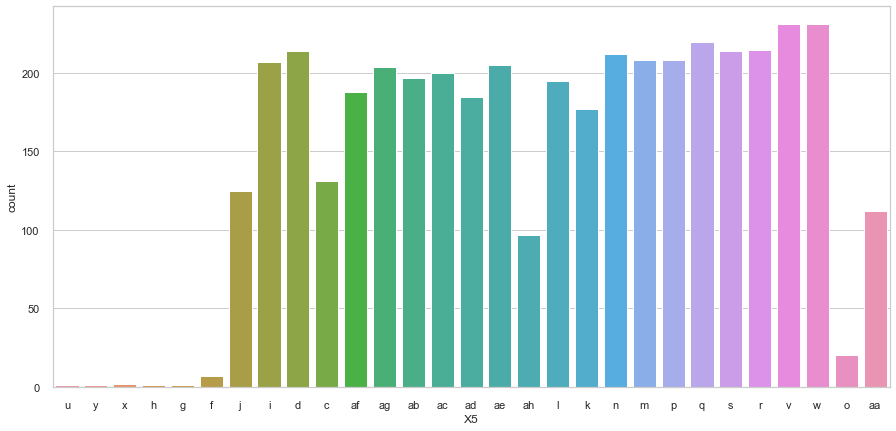

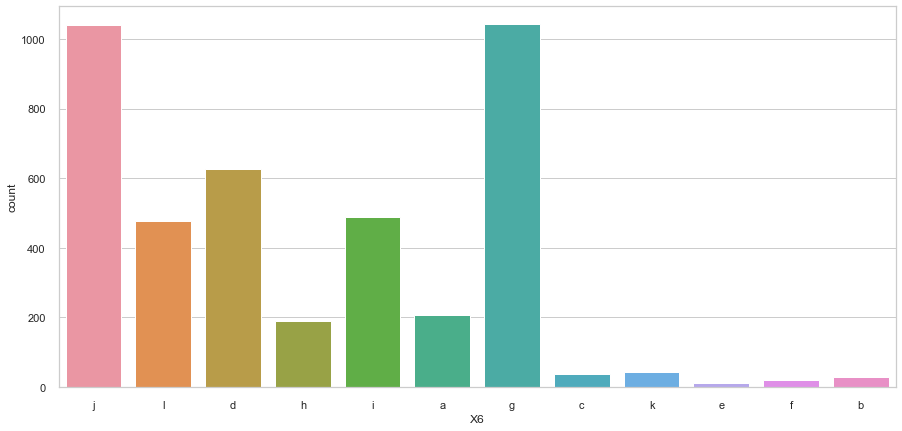

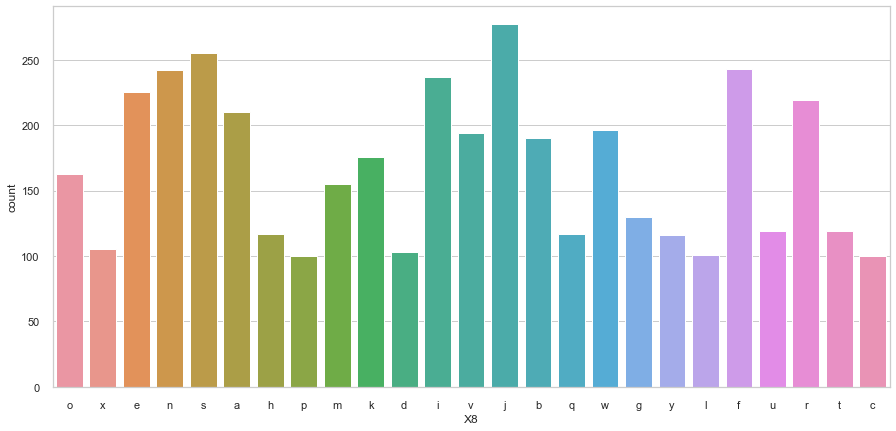

In [10]:
for i in obj_col:
    plt.figure(figsize=[15,7])
    sns.set(style="whitegrid")
    sns.countplot(x = i,data=train)
    plt.show()

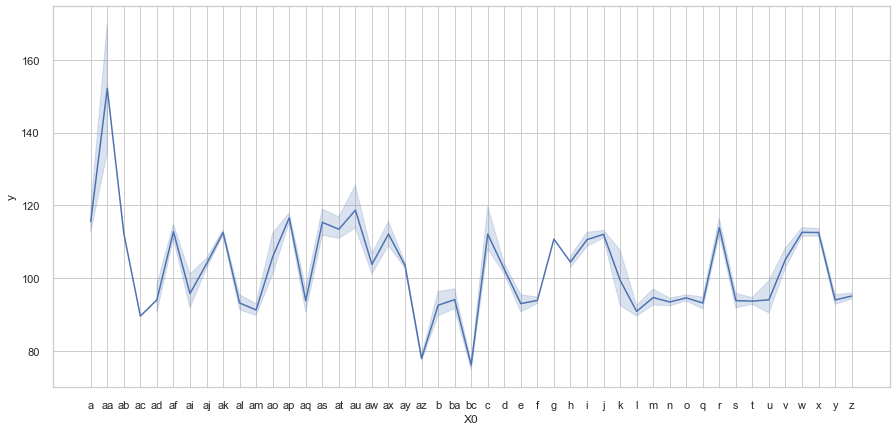

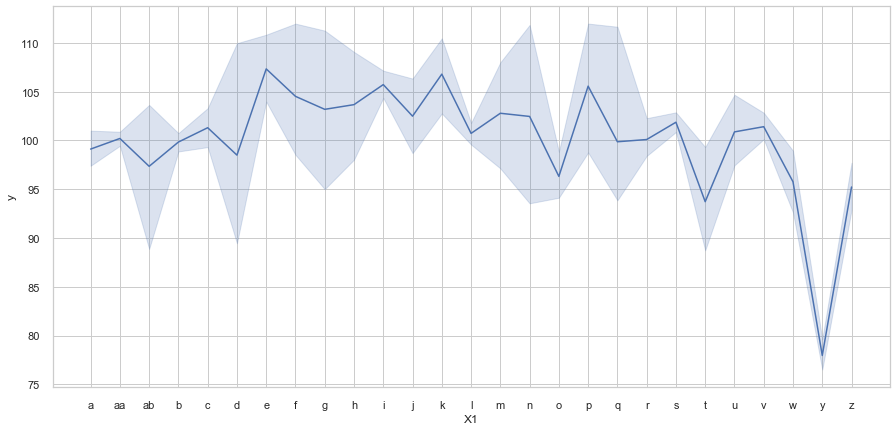

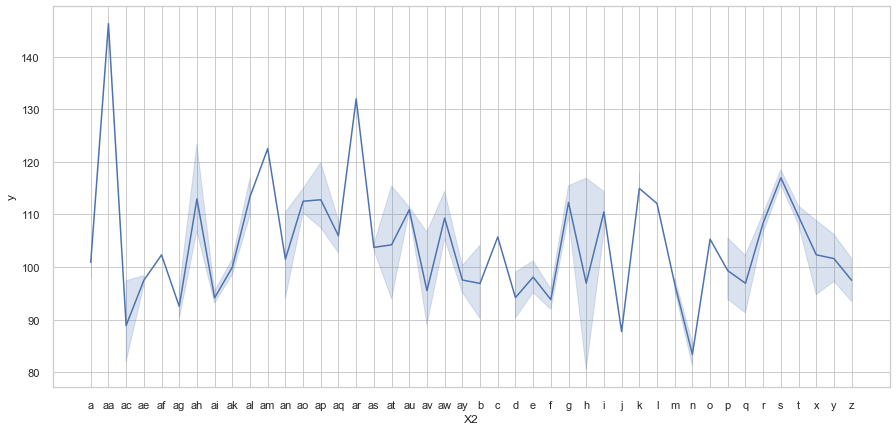

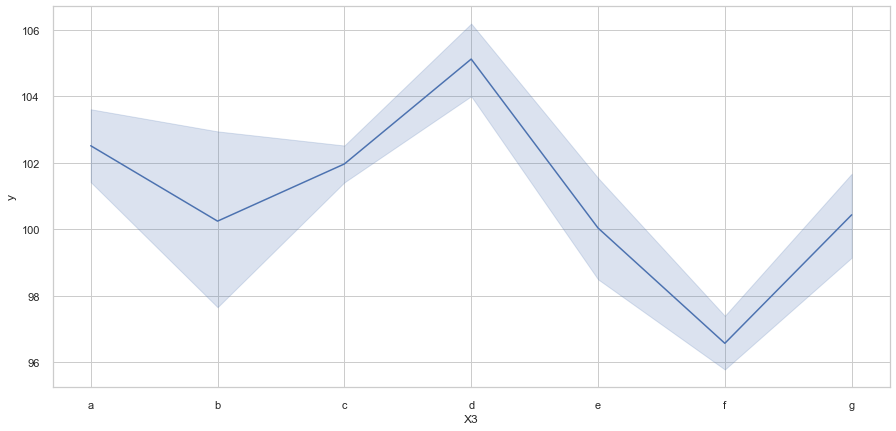

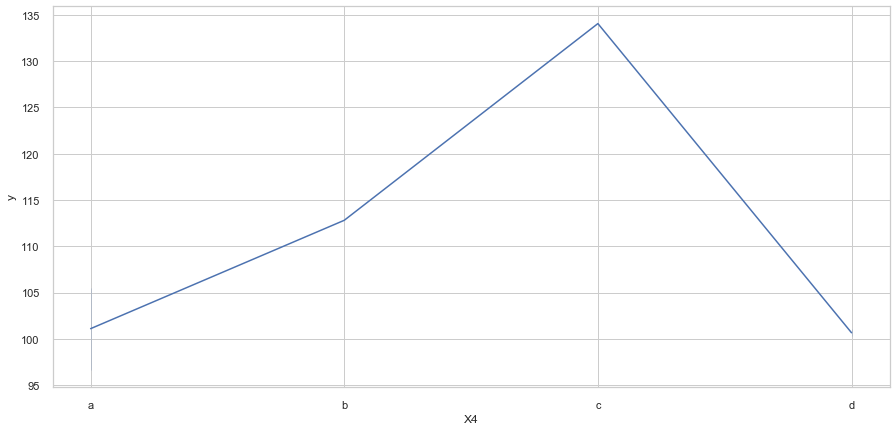

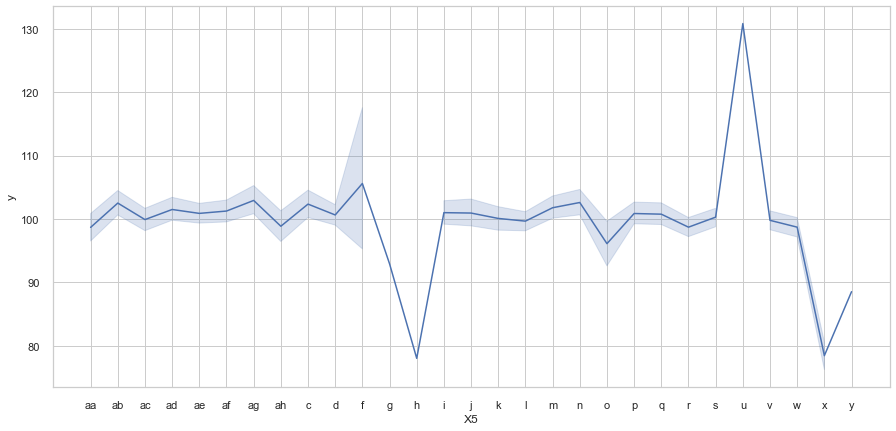

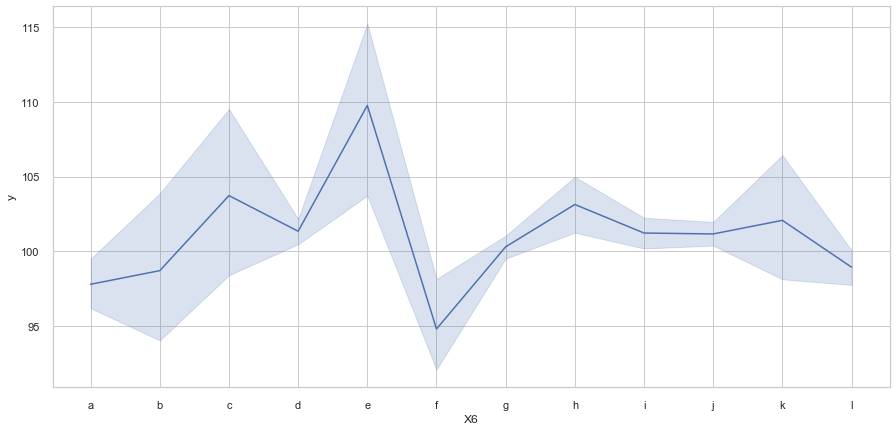

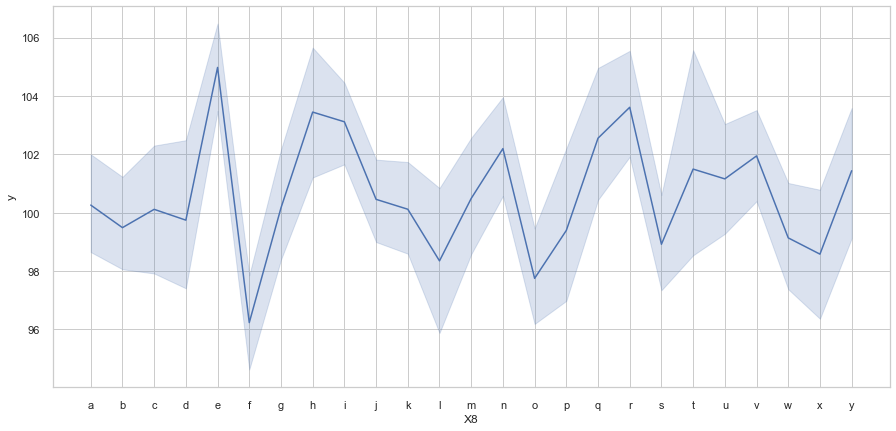

In [11]:
#sns.lineplot(x="X8",y='y',data=train)
for i in obj_col:
    plt.figure(figsize=[15,7])
    sns.set(style="whitegrid")
    sns.lineplot(x = i,y='y',data=train)
    plt.show()

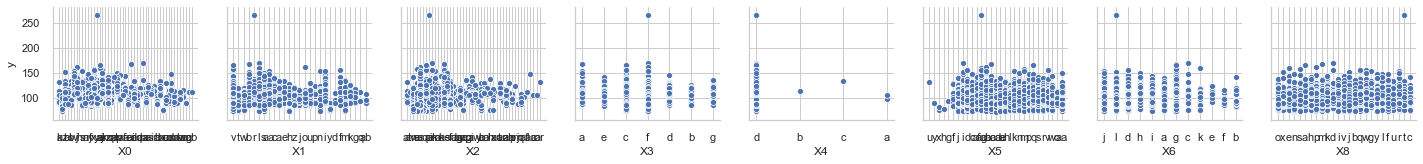

In [12]:
sns.pairplot(data = train,x_vars=obj_col,y_vars="y")


In [13]:
#sns.pairplot(data = train,x_vars=num_col,y_vars="y")

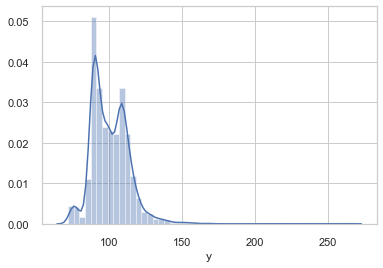

In [14]:
sns.distplot(train['y'])

### From Visualization
 * There is no Linear Relation. 
 * Target variable is completely based on Variables
 
We need to find Best Features 

In [15]:
train['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

## One hot Encoding

In [16]:
train_1 = pd.get_dummies(train)
test_1 = pd.get_dummies(test)
train_1.shape

(4209, 552)

In [17]:
corr = train_1.corr()
#plt.figure(figsize=[40,40])
#sns.heatmap(corr, linewidths=1, annot=True)

In [18]:
cor = train_1.corr()["y"].reset_index().sort_values(["y"], ascending=False)[:250]
cor[:5]

,index,y
0,y,1.000000
288,X314,0.606005
241,X261,0.588785
243,X263,0.379629
121,X136,0.368177


In [23]:
col_c = cor['index'].tolist()
train_cor = train_1[col_c]

# Test Train Split

In [24]:
from sklearn.metrics import r2_score

In [25]:
from sklearn.model_selection import train_test_split

X = train_cor.drop(["y"],axis=1)
y = train_cor[["y"]]
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,test_size=0.4,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2525, 249) (2525, 1)
(1684, 249) (1684, 1)


In [26]:
# Hence There is no Linear Relation seen from visulization. So, Linear Regression Model does not suits

In [27]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train, y_train)
pred = randf.predict(X_test)
r2_score(y_test, pred)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.4432915177067167

# Feature Selection
### RFE

In [28]:
from sklearn.feature_selection import RFE
rfe = RFE(randf, n_features_to_select=50)

In [29]:
rfe = rfe.fit(X_train, y_train)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
#print(rfe.support_)
rank = rfe.ranking_
print(rfe.ranking_)           

[  1 162   1   1  63   1   1   1  59   1 123 135  94 121   1 138  75 137
 191  81  64   1 149 148 117 188 175 166  23  65   1  83  78   1 116   1
   1   1   5  37  61  77  44 104  10   1  92  57  56   1   1   1  88  60
  42  99  43  25   1 125  19  14   1  71  97  36 103   1  74  40 144 112
  51   1 100  35   1 111   1 177 160 128 132 155 143 146   1  95 109 163
 172 182   6  39 118 130 147 129  84 156   1 133  34 124  86  26 197  67
 151  76   1   1  54 136 106 168  96 152 180 200 141 192 193 195 110  79
 184  21  45 161   1 114  90 102 171  89   1  38 194 159 189 140 198  41
  16 120  66  87  24 169 131   1   1   1   1 101   4   9 105 167  30  73
   1 126  69  13  32   7 158  47   1  11  17 186 185  82  27   1  53 183
  52  70 157  98   3   1  28 174 173  20 139 154 196 107 170  55  18  50
   2  91  49 134   1  29   1  93 113 165 176   8  33  72 179   1 115  62
 181  68   1 119  58   1  31  15   1   1  85   1 187 190 150   1  46   1
  80 127 178   1  22  12 108 145  48 142 122 153 16

In [31]:
sel_fea = X_train.columns[rfe.ranking_<25]
sel_fea.size

73

In [32]:
a = zip(X_train,rank)
rfe_col = pd.DataFrame(a, columns = ['Col', 'Rank']).sort_values("Rank")
top_col = list(rfe_col["Col"])

#print(top_col)
rfe_col[:10]

,Col,Rank
0,X314,1
37,X156,1
45,X354,1
49,X241,1
50,X355,1
51,X150,1
58,X47,1
62,X151,1
67,X171,1
221,X58,1


In [33]:
#logreg2 = LogisticRegression()
#model2 = logreg2.fit(X_train[sel_fea], y_train)
#model2.coef_
#model2.intercept_

# VIF

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train[sel_fea].columns
vif['VIF'] = [variance_inflation_factor(X_train[sel_fea].values, i) for i in range(X_train[sel_fea].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[:5]

C:\Users\Anand\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,X119,inf
5,X118,inf
1,X263,2702.11
2,X136,2673.34
52,X137,103.98


In [36]:
vif_col = vif[:180]
col = list(vif_col["Features"])
print(col)

['X119', 'X118', 'X263', 'X136', 'X137', 'X58', 'X311', 'X150', 'X363', 'X187', 'X85', 'X355', 'X329', 'X275', 'X374', 'X14', 'X321', 'X45', 'X334', 'X191', 'X161', 'X154', 'X375', 'X142', 'X171', 'X223', 'X156', 'X51', 'X100', 'X224', 'X283', 'X3_c', 'X220', 'X1_s', 'X300', 'X163', 'X64', 'X180', 'X351', 'X314', 'X50', 'X12', 'X3_a', 'X354', 'X116', 'X1_v', 'X327', 'X6_j', 'X241', 'X225', 'X6_d', 'X151', 'X315', 'X342', 'X6_i', 'X8_e', 'X226', 'X8_i', 'X6_h', 'X8_h', 'X8_n', 'X8_r', 'X8_v', 'X8_q', 'X47', 'X5_n', 'X5_ad', 'X5_m', 'X5_c', 'X5_ab', 'X5_ag', 'X1_f', 'X5_f']


In [37]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = sm.add_constant(X_train[col])
y = y_train

C:\Users\Anand\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [38]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     51.70
Date:                Sat, 18 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:08:52   Log-Likelihood:                -8755.9
No. Observations:                2525   AIC:                         1.766e+04
Df Residuals:                    2452   BIC:                         1.808e+04
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.6482      1.632     48.202      0.0

In [39]:
#results.pvalues['job_entrepreneur ']
col_pval = []

for i in col:
    a = round(results.pvalues[i],3)
    col_pval.append(a)
    
col_pval
a = zip(col,col_pval)
df_pval = pd.DataFrame(a, columns = ['Col', 'pval']).sort_values("pval")
#df_pval

In [40]:
sel_fea_pv = list(df_pval[df_pval['pval'].between(0,.05,inclusive= True)].Col)
sel_fea_pv

['X119',
 'X118',
 'X263',
 'X47',
 'X315',
 'X314',
 'X311',
 'X5_f',
 'X136',
 'X5_ag',
 'X5_c',
 'X5_n',
 'X5_ab',
 'X1_f',
 'X163',
 'X156',
 'X5_m']

In [41]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train[sel_fea], y_train)
pred = randf.predict(X_test[sel_fea])
r2_score(y_test, pred)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.45538416668945103

In [42]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train[sel_fea_pv], y_train)
pred = randf.predict(X_test[sel_fea_pv])
r2_score(y_test, pred)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5120064146356973

# WIth Given Data

In [43]:
sel_var = []
for i in sel_fea_pv:
    if i in test_1:
        sel_var.append(i)

len(sel_var)

17

In [44]:
X_train = train_1[sel_fea_pv]
y_train = train_1['y']
X_test  = test_1[sel_fea_pv]
X_test.shape

(4209, 17)

In [45]:
randf = RandomForestRegressor()
randf.fit(X_train, y_train)
pred = randf.predict(X_test)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
sam = pd.read_csv('sample_submission.csv')
sam.head()

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318


In [47]:
#rep['y'] = pred
len(pred)
#test['ID'].shape

4209

In [48]:
rep = test[['ID']]
rep['y'] = pred
rep[:5]

C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,y
0,1,77.504390
1,2,94.026862
2,3,77.504390
3,4,77.504390
4,5,111.892266


In [49]:
rep.to_csv('report_1.csv',index=False)

# Model-2

In [50]:
X = train_1.drop(["y"],axis=1)
y = train_1[["y"]]
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,test_size=0.4,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(2525, 551) (2525, 1)
(1684, 551) (1684, 1)


In [51]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train, y_train)
pred = randf.predict(X_test)
r2_score(y_test, pred)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.4674773160097896

# Feature Selection
### RFE

In [52]:
from sklearn.feature_selection import RFE
rfe = RFE(randf, n_features_to_select=50)

In [ ]:
rfe = rfe.fit(X_train, y_train)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#print(rfe.support_)
rank = rfe.ranking_
print(rfe.ranking_)           

In [ ]:
sel_fea = X_train.columns[rfe.ranking_<25]
sel_fea.size

In [ ]:
a = zip(X_train,rank)
rfe_col = pd.DataFrame(a, columns = ['Col', 'Rank']).sort_values("Rank")
top_col = list(rfe_col["Col"])

#print(top_col)
rfe_col[:10]

In [ ]:
#logreg2 = LogisticRegression()
#model2 = logreg2.fit(X_train[sel_fea], y_train)
#model2.coef_
#model2.intercept_

# VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_train[sel_fea].columns
vif['VIF'] = [variance_inflation_factor(X_train[sel_fea].values, i) for i in range(X_train[sel_fea].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif[:5]

In [ ]:
vif_col = vif[:180]
col = list(vif_col["Features"])
print(col)

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
X = sm.add_constant(X_train[col])
y = y_train

In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
#results.pvalues['job_entrepreneur ']
col_pval = []

for i in col:
    a = round(results.pvalues[i],3)
    col_pval.append(a)
    
col_pval
a = zip(col,col_pval)
df_pval = pd.DataFrame(a, columns = ['Col', 'pval']).sort_values("pval")
#df_pval

In [ ]:
sel_fea_pv = list(df_pval[df_pval['pval'].between(0,.05,inclusive= True)].Col)
sel_fea_pv

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train[sel_fea], y_train)
pred = randf.predict(X_test[sel_fea])
r2_score(y_test, pred)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
randf = RandomForestRegressor()
randf.fit(X_train[sel_fea_pv], y_train)
pred = randf.predict(X_test[sel_fea_pv])
r2_score(y_test, pred)

In [ ]:
X_train = train_1[sel_fea_pv]
y_train = train_1['y']
X_test  = test_1[sel_fea_pv]
X_test.shape

In [ ]:
randf = RandomForestRegressor()
randf.fit(X_train, y_train)
pred = randf.predict(X_test)

In [ ]:
rep = test[['ID']]
rep['y'] = pred
rep[:5]

In [ ]:
rep.to_csv('report_2.csv',index=False)

# Result

* Report_1 - .49 r2score
* Report_2 - .52 r2score